In [59]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.DiGraph()

# Create an empty graph 
G.clear()
# Add nodes representing employees
employees = ['A', 'B', 'C']

# Define the department dictionary


# Add nodes with attributes
G.add_node('A', role='manager', department='HR', BU = 'corporate' )
G.add_node('B', role='employee', department='HR', BU = 'corporate')
G.add_node('C', role='employee', department='HR', BU = 'corporate')
G.add_node('D', role='employee', department='xxx', BU = 'TEK')



In [60]:
def add_bidirectional_relationship(G, node1, node2, relationship):
    # Add the relationship from node1 to node2
    add_relationship(G, node1, node2, relationship)
    # Add the relationship from node2 to node1
    add_relationship(G, node2, node1, relationship)

def add_unidirectional_relationship(G, node1, node2, relationship):
    # Add the relationship from node1 to node2
    add_relationship(G, node1, node2, relationship)

def add_relationship(G, node1, node2, relationship):
    if G.has_edge(node1, node2):
        # Get the current relationship of the edge
        current_relationship = G[node1][node2].get('relationship', [])
        if isinstance(current_relationship, list):
            current_relationship.append(relationship)
        else:
            current_relationship = [current_relationship, relationship]
    else:
        current_relationship = [relationship]
        G.add_edge(node1, node2)

    # Set the new relationship to the edge
    G[node1][node2]['relationship'] = current_relationship




In [61]:
# Test the functions
add_bidirectional_relationship(G, 'A', 'B', 'same_department')
add_bidirectional_relationship(G, 'A', 'C', 'same_department')
add_bidirectional_relationship(G, 'B', 'C', 'same_department')
add_unidirectional_relationship(G, 'A', 'B', 'is_manager')

print(G.edges(data=True))  # This will print all edges with their attributes, including the relationship

[('A', 'B', {'relationship': ['same_department', 'is_manager']}), ('A', 'C', {'relationship': ['same_department']}), ('B', 'A', {'relationship': ['same_department']}), ('B', 'C', {'relationship': ['same_department']}), ('C', 'A', {'relationship': ['same_department']}), ('C', 'B', {'relationship': ['same_department']})]


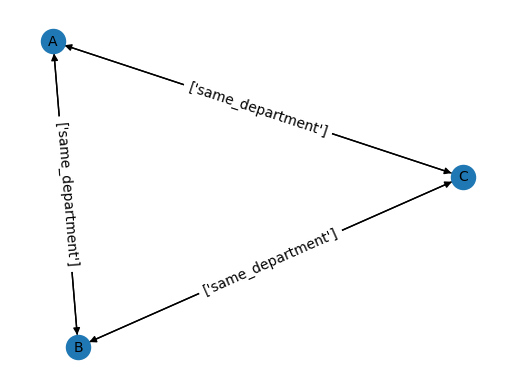

In [70]:
# 

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
corporate_nodes = [node for node, data in G.nodes(data=True) if data.get('BU') == 'corporate']
nx.draw_networkx_nodes(G, pos, nodelist=corporate_nodes, node_size=300)

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'same_department' in d['relationship']]
nx.draw_networkx_edges(G, pos, edgelist=edges)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
edge_labels = {k: [rel for rel in v if rel == 'same_department'] for k, v in edge_labels.items() if k in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

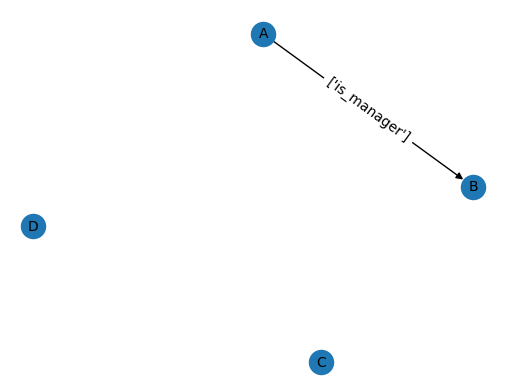

In [67]:
import matplotlib.pyplot as plt

# Draw the graph
pos = nx.spring_layout(G, k=10)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
edges = [(u, v) for u, v, d in G.edges(data=True) if 'is_manager' in d['relationship']]
nx.draw_networkx_edges(G, pos, edgelist=edges)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# edge labels
edge_labels = nx.get_edge_attributes(G, 'relationship')
edge_labels = {k: [rel for rel in v if rel == 'is_manager'] for k, v in edge_labels.items() if k in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

In [72]:
print(G.nodes(data=True))
for node, data in G.nodes(data=True):
    print(f"Node: {node}, BU: {data.get('BU')}")

[('A', {'role': 'manager', 'department': 'HR', 'BU': 'corporate'}), ('B', {'role': 'employee', 'department': 'HR', 'BU': 'corporate'}), ('C', {'role': 'employee', 'department': 'HR', 'BU': 'corporate'}), ('D', {'role': 'employee', 'department': 'xxx', 'BU': 'TEK'})]
Node: A, BU: corporate
Node: B, BU: corporate
Node: C, BU: corporate
Node: D, BU: TEK
